### 다항 회귀분석(Polynomal Regression)
##### - 선형 회귀분석(Linear Regression)과 개념은 동일함
#####   --> 독립 변수(x)가 종속변수(y)에 얼마나 영향을 주는지 인과관계를 분석.
##### - 다항 회귀분석은 --> 선형회귀 모델에 특징을 추가하여 다향회귀로 변환하여 사용한다.
##### - 모델 생성 : sklearn.preprocessing 라이브러리의  PolynomialFeatures () 함수를 이용
##### - 특징 행렬을 추가해 주어야 한다 : fit_transform() 함수 사용
##### - 독립변수(x) - 연속형, .....종속변수(y) - 연속형.
##### - 독립변수(x)는 1개 사용한다

### exe-1) 다항 회귀분석 테스트

In [11]:
### 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

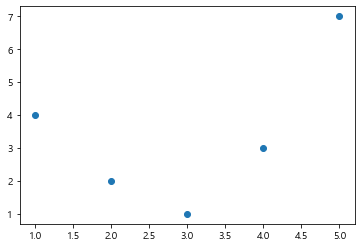

In [12]:
### 데이터 생성하기

x = np.array([1,2,3,4,5])
y = np.array([4,2,1,3,7])

# 산점도 시각화
plt.scatter(x, y) 
plt.show()

### 산점도가 직선을 띄지않고 곡선을 띄고 있다.

x = 
 [[1]
 [2]
 [3]
 [4]
 [5]]
-------------------------------
[2.  2.7 3.4 4.1 4.8]


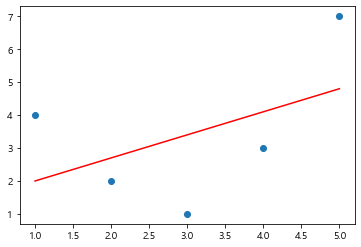

In [13]:
### 독립변수(x) 데이터를 메트릭스 형태로 변형하기
#    - 향후 다항회귀로 변환시 차원 확대를 위해서..

from sklearn.linear_model import LinearRegression

# np.newaxis : 입력을 matrix로 변환
x = x[:, np.newaxis] 
print("x = \n", x)
print("-------------------------------")


예측(테스트) 결과 =  [2.  2.7 3.4 4.1 4.8]


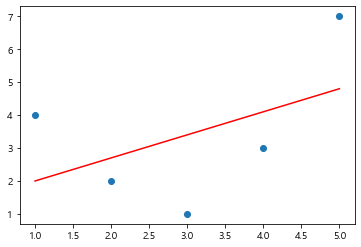

In [14]:
### 선형회귀 모델 생성하기

# 선형회귀 학습모델 생성하기
model = LinearRegression().fit(x, y) 

# 예측(테스트) 하기
y_pred = model.predict(x)
print("예측(테스트) 결과 = ", y_pred)
# [2.  2.7 3.4 4.1 4.8]

### 산점도 시각화
plt.scatter(x, y) 

### 추세선 그래프 그리기
plt.plot(x, y_pred, c='red') 
plt.show()

In [15]:
### 다항식 특징을 추가하기

from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures() : 2차항 적용을 위한 함수 
#  - degree : 열 개수, 
#  - include_bias : 편향 (false = 고려안함)
#  - 편향이란?
#    : 예측값이 정답과 얼마나 다른가(차이가 있는가, 떨어져 있는가, 
#       멀게 있는가 등등) 를 표현한 것
poly = PolynomialFeatures(degree=3, include_bias = False) 
print("poly = ", poly)

### 특징 행렬 생성하기 : 다항으로 변환하기
#  - fit_transform() : 독립변수(x)의 데이터를 2차항으로 변형
x2 = poly.fit_transform(x) 
print("x2= \n", x2)

poly =  PolynomialFeatures(degree=3, include_bias=False)
x2= 
 [[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


model = 
 LinearRegression()
---------------------------
기울기 =  [-3.76190476  0.32142857  0.08333333]
-------------------------------
y절편 =  7.399999999999769
-------------------------------
예측값(y_pred2) = 
 [4.04285714 1.82857143 1.25714286 2.82857143 7.04285714]
-------------------------------
실제값(y) = 
 [4 2 1 3 7]
-------------------------------
결정계수(R-squared) =  0.9939353099730458
-------------------------------


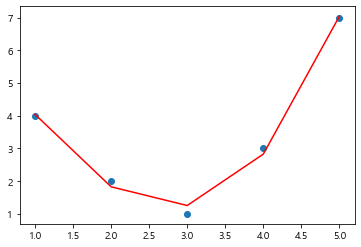

In [25]:
### 다항으로 변환된 독립변수(x2)의 값 사용을 위한 
### 선형회귀 모델 생성하기

# 선형회귀분석에서 결정계수 확인을 위한 라이브러리
from sklearn.metrics import r2_score

# 선형회귀 학습모델 생성 : 다항 독립변수(x2)를 사용
model2 = LinearRegression().fit(x2, y) 

print("model = \n", model2)
print("---------------------------")

# 기울기 
print("기울기 = ", model2.coef_)   
print("-------------------------------")

# y절편
print("y절편 = ", model2.intercept_) 
print("-------------------------------")

# 예측(테스트) 하기..
y_pred2 = model2.predict(x2)

### 결과 확인해 보기
print("예측값(y_pred2) = \n", y_pred2)
print("-------------------------------")

print("실제값(y) = \n", y)
print("-------------------------------")

# 결정계수(R-squared)
print("결정계수(R-squared) = ", r2_score(y, y_pred2))   
print("-------------------------------")

### 다항 회귀 시각화 하기
# 산점도 표시
plt.scatter(x, y)

# 다항회귀모델 예측결과 값을 이용한 추세선 그래프
plt.plot(x, y_pred2, c='red') 
plt.show()

### (해석)
# - 실제 독립변수(x)의 곡선의 분포에 맞게
# - 다항회귀분석 예측 결과 추세선이 잘 그려졌음
# - 결정계수(R-squared)의 값이 [0.994]로 
#   예측 결과가 매우 정확한 모델로 확인됨